(60000, 28, 28)
(60000,)


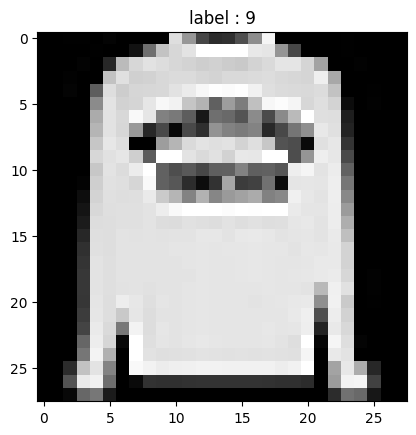

In [42]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(X_train.shape)
print(y_train.shape)

plt.imshow(X_train[124] , cmap = "gray")
plt.title(f"label : {y_train[0]}")
plt.show()

In [43]:
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.reshape(-1,784)
X_test =  X_test.reshape(-1,784)

y_train = to_categorical(y_train ,10)
y_test = to_categorical(y_test, 10)

y_train.shape

(60000, 10)

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout

model = Sequential([
    Dense(256 , activation = "relu" , input_shape = (784,)),
    Dropout(0.4),
    Dense(128 , activation = "relu"),
    Dropout(0.3),
    Dense(10 , activation = "softmax")
])

In [45]:
model.compile(
    optimizer = "adam" ,
    loss = "categorical_crossentropy" ,
    metrics = ["accuracy"]
)

history = model.fit(X_train , y_train , epochs = 15 , batch_size = 128 , validation_split = 0.1 , verbose = 1)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6753 - loss: 0.9191 - val_accuracy: 0.8418 - val_loss: 0.4368
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8288 - loss: 0.4753 - val_accuracy: 0.8620 - val_loss: 0.3856
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8498 - loss: 0.4197 - val_accuracy: 0.8715 - val_loss: 0.3588
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8557 - loss: 0.3976 - val_accuracy: 0.8722 - val_loss: 0.3508
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8640 - loss: 0.3777 - val_accuracy: 0.8762 - val_loss: 0.3425
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8666 - loss: 0.3677 - val_accuracy: 0.8760 - val_loss: 0.3328
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8709 - loss: 0.3510 - val_accuracy: 0.8730 - val_loss: 0.3348
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8750 - loss: 0.3439 - val_accuracy: 

In [46]:
test_loss , test_acc = model.evaluate(X_test , y_test)
print(f"Test Loss : {test_loss} , Test Accuracy : {test_acc}")

import numpy as np

idx = np.random.randint(0,len(X_test))
prediction = model.predict(X_test[idx].reshape(1,784))
print("tahmin : ",prediction.argmax())

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8847 - loss: 0.3224
Test Loss : 0.3239760100841522 , Test Accuracy : 0.8841000199317932
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
tahmin :  0


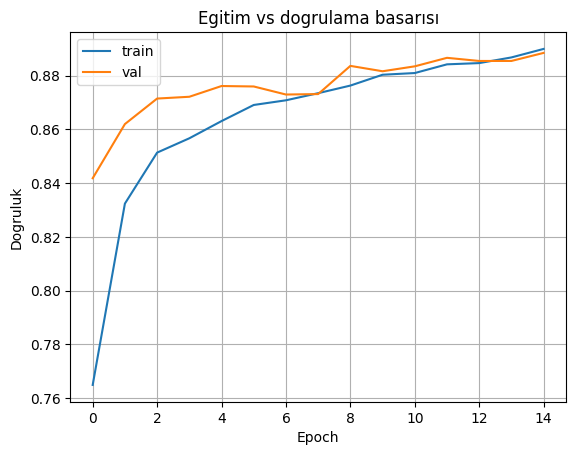

In [47]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"] , label = "val")
plt.xlabel("Epoch")
plt.ylabel("Dogruluk")
plt.title("Egitim vs dogrulama basarısı")
plt.legend()
plt.grid(True)
plt.show()